Importing the necessary Libraries and Packages

In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay

Loading the Dataset 

In [181]:
df1=pd.read_csv("C:/Users/HP/Downloads/Diabetes Prediction/DS1_Diabetes.csv")


In [182]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [183]:
df1.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
44,7,159,64,0,0,27.4,0.294,40,0
45,0,180,66,39,0,42.0,1.893,25,1
46,1,146,56,0,0,29.7,0.564,29,0
47,2,71,70,27,0,28.0,0.586,22,0
48,7,103,66,32,0,39.1,0.344,31,1


In [184]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               49 non-null     int64  
 1   Glucose                   49 non-null     int64  
 2   BloodPressure             49 non-null     int64  
 3   SkinThickness             49 non-null     int64  
 4   Insulin                   49 non-null     int64  
 5   BMI                       49 non-null     float64
 6   DiabetesPedigreeFunction  49 non-null     float64
 7   Age                       49 non-null     int64  
 8   Outcome                   49 non-null     int64  
dtypes: float64(2), int64(7)
memory usage: 3.6 KB


Finding Missing Values

In [185]:
df1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Getting Statistical measures about the data

In [186]:
df1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,5.387755,127.836735,70.591837,19.448980,83.204082,31.895918,0.525224,37.551020,0.510204
std,3.534451,32.772795,20.489752,16.657157,154.272213,8.005726,0.431686,11.471089,0.505076
min,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.134000,21.000000,0.000000
25%,2.000000,103.000000,66.000000,0.000000,0.000000,27.400000,0.254000,29.000000,0.000000
50%,5.000000,119.000000,72.000000,23.000000,0.000000,31.600000,0.420000,33.000000,1.000000
75%,8.000000,147.000000,82.000000,33.000000,115.000000,37.600000,0.587000,48.000000,1.000000
max,13.000000,197.000000,110.000000,47.000000,846.000000,45.800000,2.288000,60.000000,1.000000




if status is :

1--------> Patient is Diabetes Positive

0-------->Patient is Healthy


In [187]:
df1['Outcome'].value_counts()

Outcome
1    25
0    24
Name: count, dtype: int64

In [188]:
df1.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,5.333333,116.166667,70.375,14.00,40.75,30.220833,0.43225,35.416667
1,5.440000,139.040000,70.800,24.68,123.96,33.504000,0.61448,39.600000


In [189]:
X=df1.drop(columns=['Outcome'])
y=df1['Outcome']

In [190]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
5,5,116,74,0,0,25.6,0.201,30
6,3,78,50,32,88,31.0,0.248,26
7,10,115,0,0,0,35.3,0.134,29
8,2,197,70,45,543,30.5,0.158,53
9,8,125,96,0,0,0.0,0.232,54


In [191]:
y

0     1
1     0
2     1
3     0
4     1
5     0
6     1
7     0
8     1
9     1
10    0
11    1
12    0
13    1
14    1
15    1
16    1
17    1
18    0
19    1
20    0
21    0
22    1
23    1
24    1
25    1
26    1
27    0
28    0
29    0
30    0
31    1
32    0
33    0
34    0
35    0
36    0
37    1
38    1
39    1
40    0
41    0
42    0
43    1
44    0
45    1
46    0
47    0
48    1
Name: Outcome, dtype: int64

Test_Train_Split of Data in 80:20 ratio in Train and Test 

In [192]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2,test_size=0.2)
print(X.shape,X_test.shape,X_train.shape)
print(y.shape,y_test.shape,y_train.shape)

(49, 8) (10, 8) (39, 8)
(49,) (10,) (39,)


In [193]:
print(X_train)

    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
2             8      183             64              0        0  23.3   
9             8      125             96              0        0   0.0   
17            7      107             74              0        0  29.6   
30            5      109             75             26        0  36.0   
25           10      125             70             26      115  31.1   
46            1      146             56              0        0  29.7   
29            5      117             92              0        0  34.1   
27            1       97             66             15      140  23.2   
1             1       85             66             29        0  26.6   
24           11      143             94             33      146  36.6   
33            6       92             92              0        0  19.9   
38            2       90             68             42        0  38.2   
19            1      115             70            

In [194]:
print(X_test)

    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
23            9      119             80             35        0  29.0   
12           10      139             80              0        0  27.1   
42            7      106             92             18        0  22.7   
16            0      118             84             47      230  45.8   
35            4      103             60             33      192  24.0   
44            7      159             64              0        0  27.4   
47            2       71             70             27        0  28.0   
13            1      189             60             23      846  30.1   
14            5      166             72             19      175  25.8   
0             6      148             72             35        0  33.6   

    DiabetesPedigreeFunction  Age  
23                     0.263   29  
12                     1.441   57  
42                     0.235   48  
16                     0.551   31  
35              

In [195]:
print(y_train)

2     1
9     1
17    1
30    0
25    1
46    0
29    0
27    0
1     0
24    1
33    0
38    1
19    1
36    0
10    0
4     1
6     1
3     0
39    1
5     0
32    0
28    0
20    0
26    1
37    1
21    0
41    0
31    1
34    0
7     0
48    1
11    1
18    0
43    1
22    1
8     1
45    1
15    1
40    0
Name: Outcome, dtype: int64


In [196]:
print(y_test)

23    1
12    0
42    0
16    1
35    0
44    0
47    0
13    1
14    1
0     1
Name: Outcome, dtype: int64


Feature Scaling

In [197]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [198]:
print(X_train_scaled)

[[ 0.71059546  1.74732116 -0.2657174  -1.09231915 -0.61679096 -1.13067312
   0.37147819 -0.40619849]
 [ 0.71059546 -0.05662246  1.18238443 -1.09231915 -0.61679096 -3.97914182
  -0.62144483  1.62007071]
 [ 0.43066391 -0.61646703  0.18681442 -1.09231915 -0.61679096 -0.3604863
  -0.57179868 -0.49830163]
 [-0.12919917 -0.55426208  0.2320676   0.45462445 -0.61679096  0.4219257
   0.08714115  2.17268959]
 [ 1.27045855 -0.05662246  0.00580169  0.45462445  0.43343966 -0.17710849
  -0.6823742   0.42272982]
 [-1.24892535  0.59652954 -0.62774286 -1.09231915 -0.61679096 -0.34826111
   0.12776072 -0.68250792]
 [-0.12919917 -0.30544227  1.0013717  -1.09231915 -0.61679096  0.18964714
  -0.38449729  0.14642039]
 [-1.24892535 -0.92749179 -0.17521104 -0.19985169  0.66175067 -1.1428983
  -0.0460008  -1.32722994]
 [-1.24892535 -1.3007215  -0.17521104  0.63311795 -0.61679096 -0.72724193
  -0.35290429 -0.49830163]
 [ 1.55039009  0.50322211  1.09187806  0.87110927  0.71654531  0.49527683
  -0.57179868  1.343

In [199]:
print(X_test_scaled)

[[ 9.90527001e-01 -2.43237314e-01  4.58333512e-01  9.90104932e-01
  -6.16790960e-01 -4.33837425e-01 -5.51488890e-01 -6.82507924e-01]
 [ 1.27045855e+00  3.78812210e-01  4.58333512e-01 -1.09231915e+00
  -6.16790960e-01 -6.66115988e-01  2.10683685e+00  1.89638015e+00]
 [ 4.30663914e-01 -6.47569504e-01  1.00137170e+00 -2.13581958e-02
  -6.16790960e-01 -1.20402424e+00 -6.14674901e-01  1.06745184e+00]
 [-1.52885689e+00 -2.74339790e-01  6.39346241e-01  1.70407890e+00
   1.48367028e+00  1.61999408e+00  9.84243628e-02 -4.98301633e-01]
 [-4.09130718e-01 -7.40876933e-01 -4.46730132e-01  8.71109270e-01
   1.13663756e+00 -1.04509680e+00  1.03493131e+00 -3.14095342e-01]
 [ 4.30663914e-01  1.00086173e+00 -2.65717403e-01 -1.09231915e+00
  -6.16790960e-01 -6.29440426e-01 -4.81532950e-01  3.30626676e-01]
 [-9.68993806e-01 -1.73615617e+00  5.80169002e-03  5.14122284e-01
  -6.16790960e-01 -5.56089300e-01  1.77406876e-01 -1.32722994e+00]
 [-1.24892535e+00  1.93393602e+00 -4.46730132e-01  2.76130960e-01
   

Model Training

In [200]:
model=LogisticRegression()
model.fit(X_train_scaled,y_train)

LogisticRegression()

Model Evaluation

Accuracy Score

In [201]:
X_train_predictions=model.predict(X_train_scaled)
Train_data_accuracy=accuracy_score(X_train_predictions,y_train)
Train_data_accuracy

0.6410256410256411

In [202]:
X_test_predictions=model.predict(X_test_scaled)
Test_data_accuracy=accuracy_score(X_test_predictions,y_test)
Test_data_accuracy

0.8

In [203]:
accuracy = accuracy_score(y_test, X_test_predictions)
print(f'Model Accuracy: {accuracy:.2f}')

Model Accuracy: 0.80


Confusion Matrix

In [204]:
cm=confusion_matrix(y_test,X_test_predictions)

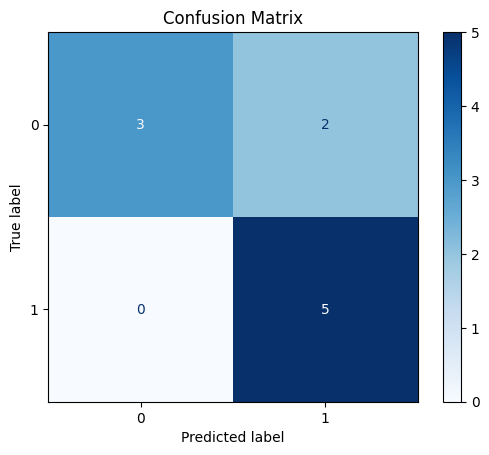

In [205]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()